# CREDIT CARD FRAUD DETECTION

The project aims to develop a predictive model for credit card fraud detection by analyzing historical transaction data and utilizing  machine learning algorithms. Credit card fraud is the unauthorized or fraudulent use of a credit card for financial gain, and the objective is to predict and identify potential fraudulent transactions in real-time to mitigate financial losses for cardholders and issuers

**Dataset Features**:

* Unnamed: 0: An index or identifier for each entry in the dataset.

* trans_date_trans_time: The date and time of the transaction.

* cc_num: The credit card number used for the transaction (likely with sensitive information masked).

* merchant: The name or identifier of the merchant where the transaction took place.

* category: The category or type of the transaction (e.g., retail, online purchase, etc.).

* amt: The transaction amount (in a specific currency).

* first and last: The first and last names of the individual associated with the credit card.

* gender: The gender of the individual.

* street, city, state, zip, lat, long, city_pop: Address and location information related to the individual's residence.

* job: The occupation or job of the individual.

* dob: Date of birth of the individual.

* trans_num: A unique transaction identifier.

* unix_time: The transaction time in Unix timestamp format.

* merch_lat and merch_long: Latitude and longitude of the merchant's location.

* is_fraud: A binary variable indicating whether the transaction is fraudulent (1 for fraud, 0 for non-fraud).

# E.D.A.

## Overview Stage

* Read the csv
* Look for basic information about the dataset

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("fraud/fraudTrain.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.shape

(1296675, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## Data Cleaning

In [6]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

### Checking missing values


In [7]:
import numpy as np

In [8]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

* We have to deal with all possible version of (-1)

In [9]:
df.replace("-1", np.nan, inplace = True)

In [10]:
df.replace(-1, np.nan, inplace = True)

In [11]:
df.replace(-1.0, np.nan, inplace = True)

In [12]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

* No missing values found in the dataset

## Checking for duplicate values

In [13]:
df.duplicated().sum()

0

## Data Preparation

In [14]:
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [15]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

## Data Exploration and Descriptive Statistics


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

### Distribution of fraud transactions

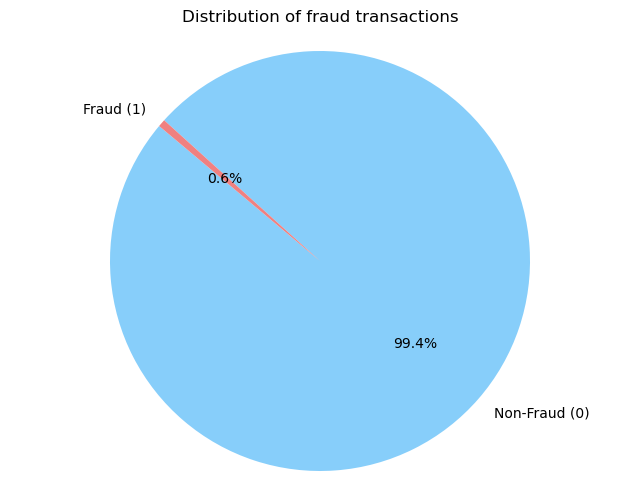

In [17]:
data = df['is_fraud'].value_counts()
labels = ["Non-Fraud (0)", "Fraud (1)"]
colors = ["lightskyblue", "lightcoral"]

plt.figure(figsize=(8, 6))
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of fraud transactions")
plt.axis('equal')  

plt.show()

### Distribution of Fraud and Non-Fraud Transactions by Category

In [18]:
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

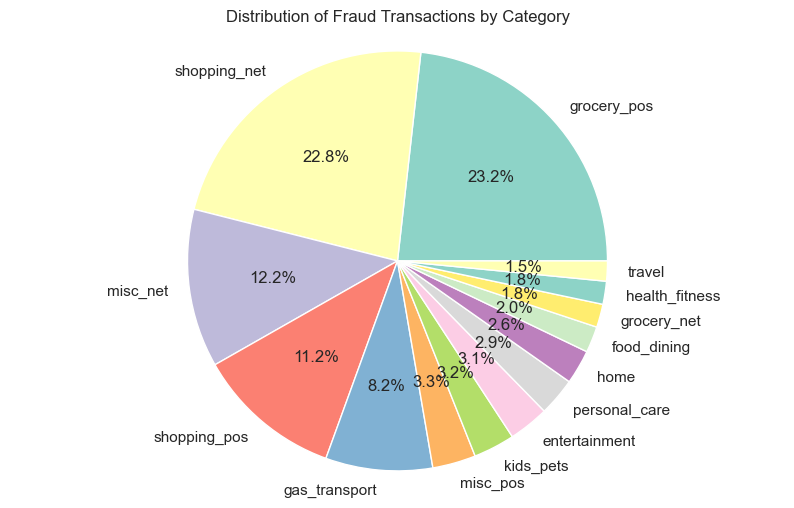

In [19]:
fraud_df = df[df['is_fraud'] == 1]

fraud_counts = fraud_df['category'].value_counts()

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title('Distribution of Fraud Transactions by Category')
plt.axis('equal')  

plt.show()

### Merchant Analysis

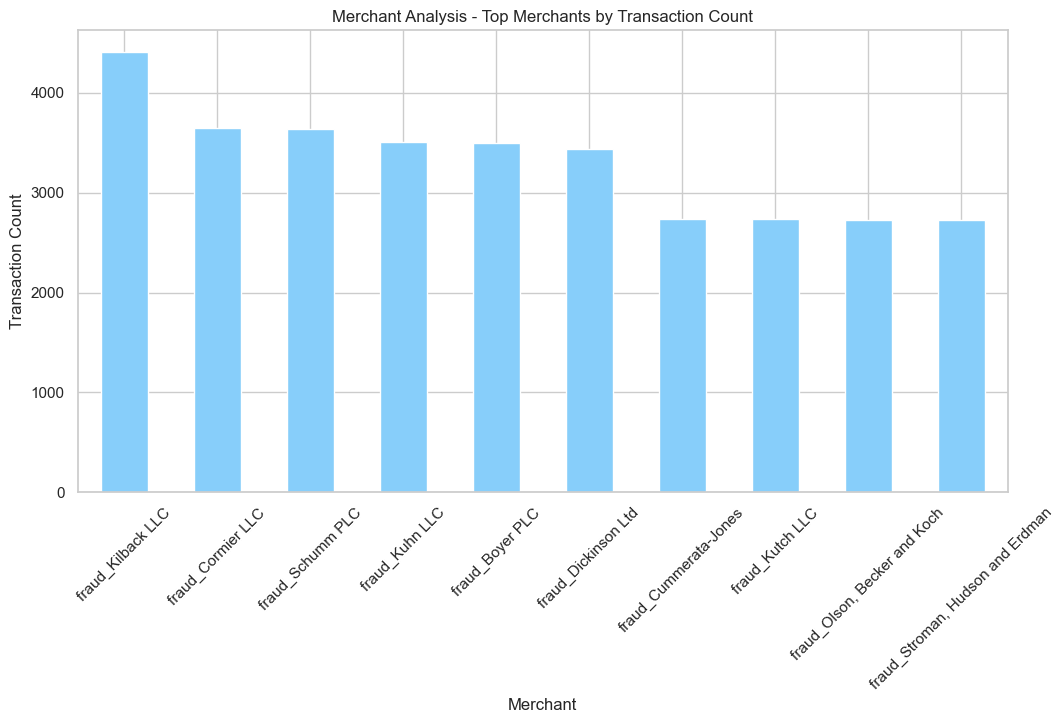

In [20]:
merchant_counts = df['merchant'].value_counts()

top_merchants = merchant_counts.head(10)

plt.figure(figsize=(12, 6))
top_merchants.plot(kind='bar', color='lightskyblue')
plt.title("Merchant Analysis - Top Merchants by Transaction Count")
plt.xlabel("Merchant")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)  
plt.show()

### Occupation Analysis

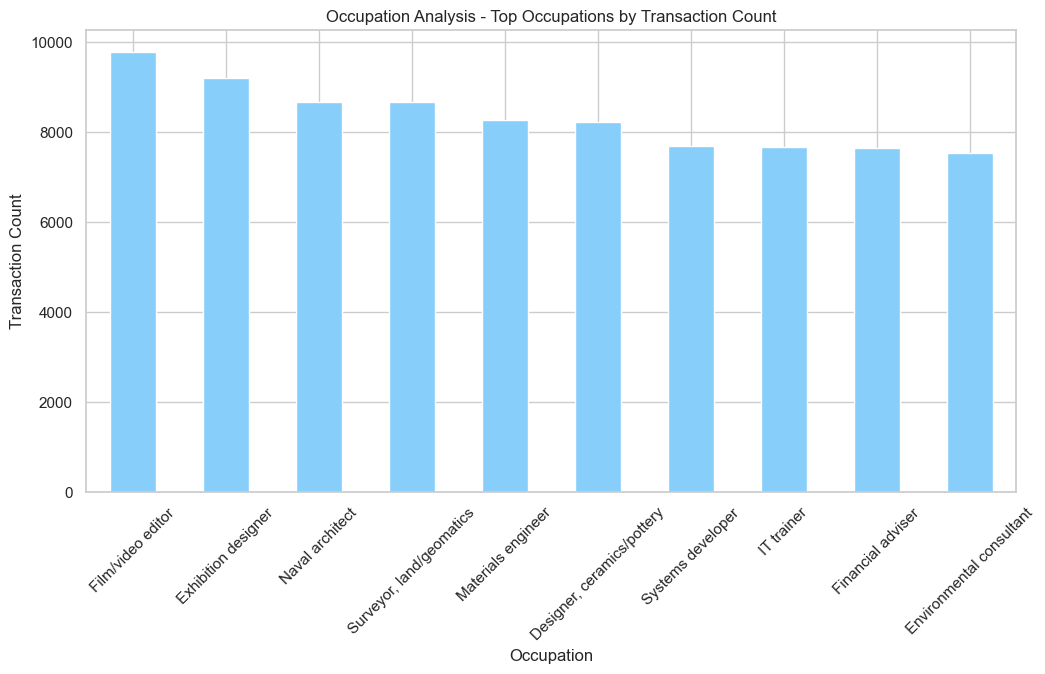

In [21]:
occupation_counts = df['job'].value_counts()

top_occupations = occupation_counts.head(10)

plt.figure(figsize=(12, 6))
top_occupations.plot(kind='bar', color='lightskyblue')
plt.title("Occupation Analysis - Top Occupations by Transaction Count")
plt.xlabel("Occupation")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Time of Day Analysis

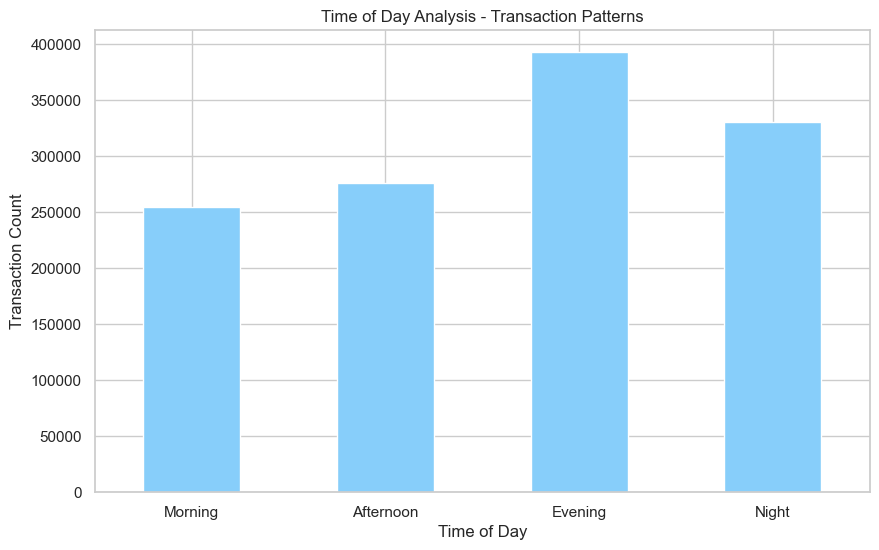

In [22]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df['hour_of_day'] = df['trans_date_trans_time'].dt.hour

time_of_day_labels = ['Morning', 'Afternoon', 'Evening', 'Night']
time_of_day_bins = [0, 6, 12, 18, 24]  # Morning (0-6), Afternoon (6-12), Evening (12-18), Night (18-24)

df['time_of_day'] = pd.cut(df['hour_of_day'], bins=time_of_day_bins, labels=time_of_day_labels)

time_of_day_counts = df['time_of_day'].value_counts()

plt.figure(figsize=(10, 6))
time_of_day_counts = time_of_day_counts[time_of_day_labels].sort_index()
time_of_day_counts.plot(kind='bar', color='lightskyblue')
plt.title("Time of Day Analysis - Transaction Patterns")
plt.xlabel("Time of Day")
plt.ylabel("Transaction Count")
plt.xticks(rotation=0) 
plt.show()

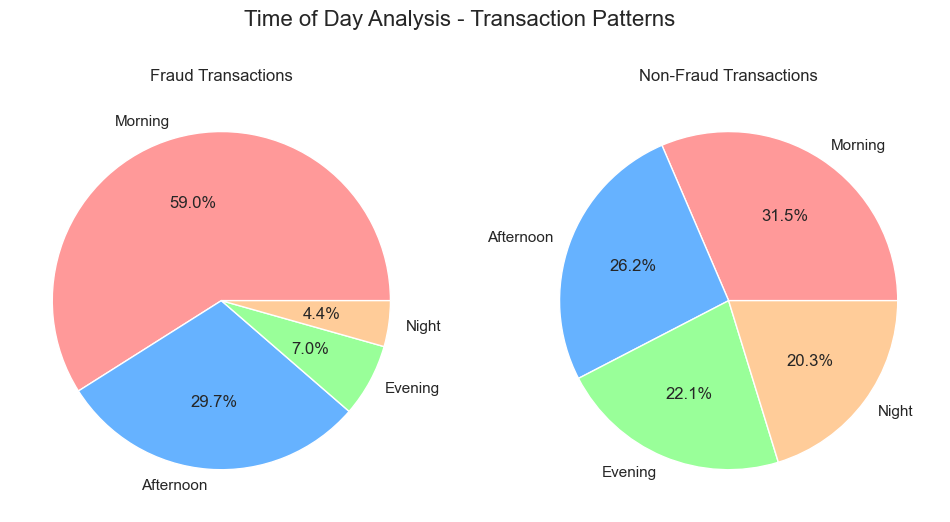

In [23]:
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Define time of day categories
time_of_day_labels = ['Morning', 'Afternoon', 'Evening', 'Night']
time_of_day_bins = [0, 6, 12, 18, 24]  # Morning (0-6), Afternoon (6-12), Evening (12-18), Night (18-24)

# Categorize transactions into time of day bins
df['time_of_day'] = pd.cut(df['hour_of_day'], bins=time_of_day_bins, labels=time_of_day_labels)

# Separate data into fraud and non-fraud transactions
fraud_data = df[df['is_fraud'] == 1]
non_fraud_data = df[df['is_fraud'] == 0]

# Count the number of transactions for each time of day in fraud and non-fraud data
fraud_time_of_day_counts = fraud_data['time_of_day'].value_counts()
non_fraud_time_of_day_counts = non_fraud_data['time_of_day'].value_counts()

# Create pie charts for fraud transactions and non-fraud transactions with custom colors
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Time of Day Analysis - Transaction Patterns", fontsize=16)

# Pie chart for fraud transactions
axes[0].pie(fraud_time_of_day_counts, labels=time_of_day_labels, autopct='%1.1f%%', colors=colors)
axes[0].set_title("Fraud Transactions")

# Pie chart for non-fraud transactions
axes[1].pie(non_fraud_time_of_day_counts, labels=time_of_day_labels, autopct='%1.1f%%', colors=colors)
axes[1].set_title("Non-Fraud Transactions")

plt.show()

### Gender Distribution

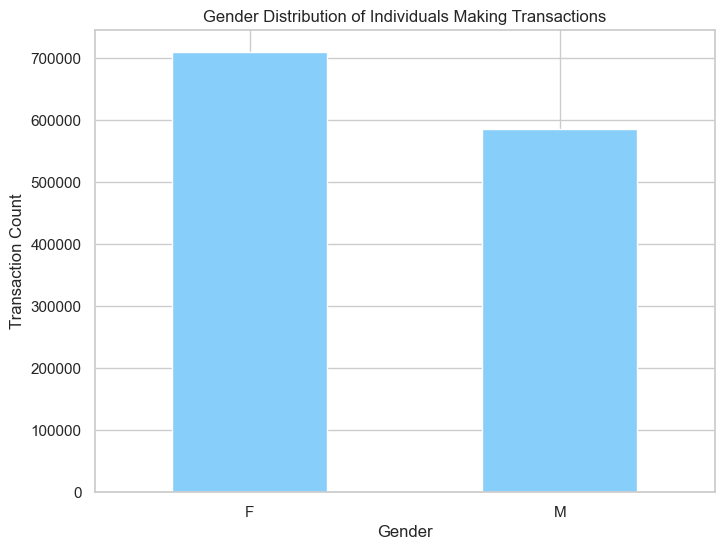

In [24]:
# Count the number of transactions for each gender
gender_counts = df['gender'].value_counts()

# Create a bar chart to visualize the gender distribution
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color='lightskyblue')
plt.title("Gender Distribution of Individuals Making Transactions")
plt.xlabel("Gender")
plt.ylabel("Transaction Count")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

### Location Analysis

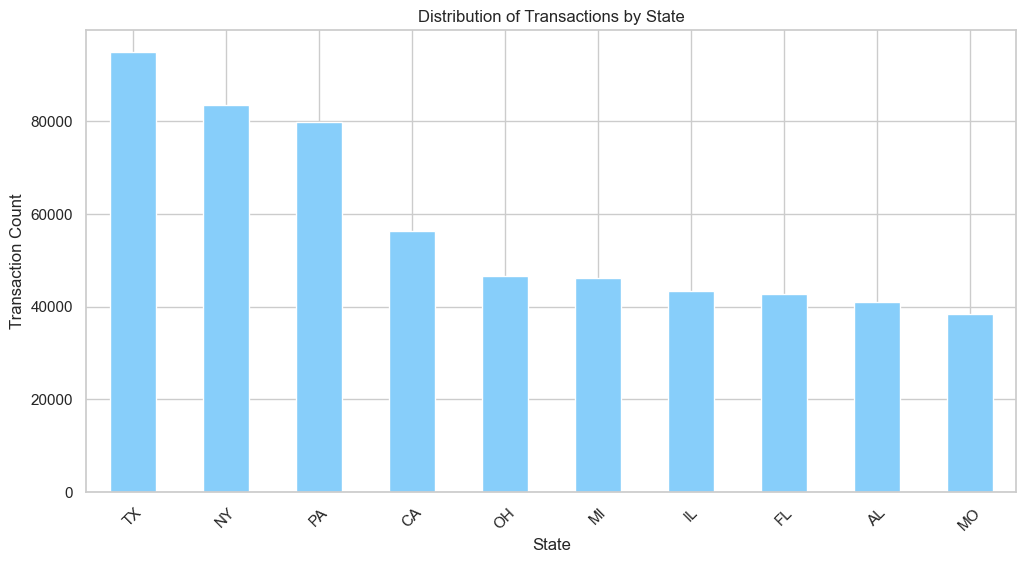

In [25]:
# Choose either 'city' or 'state' for analysis (you can repeat the process for both if needed)
location_column = 'state'  # Change to 'city' if you want to analyze by city

# Count the number of transactions for each city or state
location_counts = df[location_column].value_counts()

# Limit the number of locations displayed (optional, you can remove this line if you want to show all)
top_locations = location_counts.head(10)

# Create a bar chart to visualize the location distribution
plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar', color='lightskyblue')
plt.title(f"Distribution of Transactions by {location_column.capitalize()}")
plt.xlabel(location_column.capitalize())
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [26]:
""""
import folium


m = folium.Map(location=[37.7749, -122.4194], zoom_start=10)

fraud_data = df[df['is_fraud'] == 1]

for index, row in fraud_data.iterrows():
    lat, lon = row['merch_lat'], row['merch_long']
    folium.Marker(location=[lat, lon], popup='Fraud Transaction').add_to(m)

m.save('fraud_map.html')  # Save the map to an HTML file
m

SyntaxError: incomplete input (1622091256.py, line 1)

### Heatmap of Correlations

In [27]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour_of_day,time_of_day
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,NaN
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,NaN
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,NaN


In [28]:
df.drop(columns = ["trans_date_trans_time","cc_num", "first", "last", "street",
                   "city", "state","zip", "dob", "trans_num"],
       inplace = True)

In [29]:
# Review the dataset
df.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,hour_of_day,time_of_day
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,0,NaN
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,0,NaN
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,0,NaN
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,0,NaN
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,0,NaN


In [30]:
df.drop(columns = ["hour_of_day","time_of_day"],
       inplace = True)

In [31]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()

cat_columns = ['merchant','category','gender','job']
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,241,4,107.23,0,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,390,0,220.11,1,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,360,2,45.00,1,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,297,9,41.96,1,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0


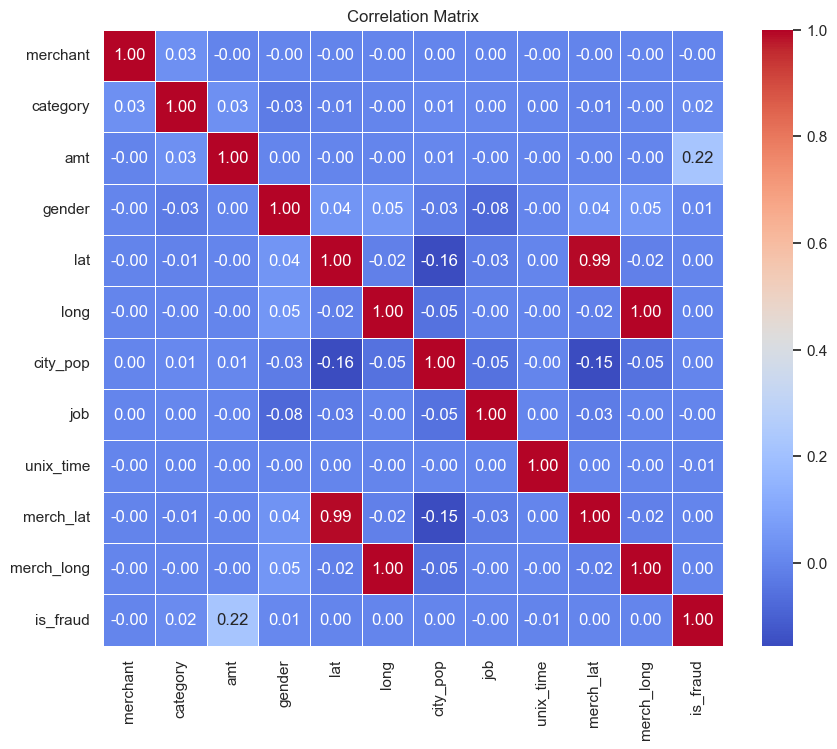

In [33]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Data Preparation for Machine Learning Models


In [34]:
# Review the dataset
df.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,241,4,107.23,0,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,390,0,220.11,1,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,360,2,45.00,1,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,297,9,41.96,1,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0


In [35]:
# Review the columns
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'lat', 'long', 'city_pop',
       'job', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [36]:
X = df.drop("is_fraud", axis = 1)
y = df['is_fraud']


In [37]:
# Review the features
X.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long
0,514,8,4.97,0,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315
1,241,4,107.23,0,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462
2,390,0,220.11,1,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481
3,360,2,45.00,1,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071
4,297,9,41.96,1,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459


In [38]:
# Review the labels
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler

In [40]:
X_train,X_valid,y_train,y_valid = train_test_split(X, y, test_size=0.2,
                                                 random_state=2,
                                                stratify = y)

In [41]:
sc =StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_valid_std = sc.transform(X_valid)

In [42]:
X_train_std

array([[ 1.0757215 , -1.08035998, -0.05302657, ..., -0.18874604,
        -1.28823223, -0.44929879],
       [-1.28748133, -0.31369606, -0.18818075, ...,  1.56919363,
        -1.41131308, -0.39453762],
       [ 0.88169011,  0.96407712, -0.43128234, ...,  0.44007279,
        -2.51095742,  0.58271085],
       ...,
       [ 0.14039069,  0.96407712, -0.26226108, ...,  1.32285154,
        -1.6119837 ,  0.25045347],
       [-0.71533749,  0.96407712, -0.28777135, ..., -0.60088344,
         0.80323379,  0.85720683],
       [-0.54120676,  0.19741321, -0.08990965, ...,  0.01560177,
        -1.07332786, -0.49589236]])

## Feature Engineering

In [43]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(n_estimators = 500,
                               random_state = 1)
forest.fit(X_train, y_train)

In [ ]:
importances = forest.feature_importances_

In [ ]:
importances

In [ ]:
indices = np.argsort(importances)[::-1]
indices

In [ ]:
feat_labels = df.columns
feat_labels

In [73]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) amt                            0.424044
 2) category                       0.186910
 3) unix_time                      0.065619
 4) merch_long                     0.053582
 5) merch_lat                      0.053126
 6) city_pop                       0.049855
 7) merchant                       0.044133
 8) job                            0.039173
 9) lat                            0.037559
10) long                           0.036202
11) gender                         0.009798


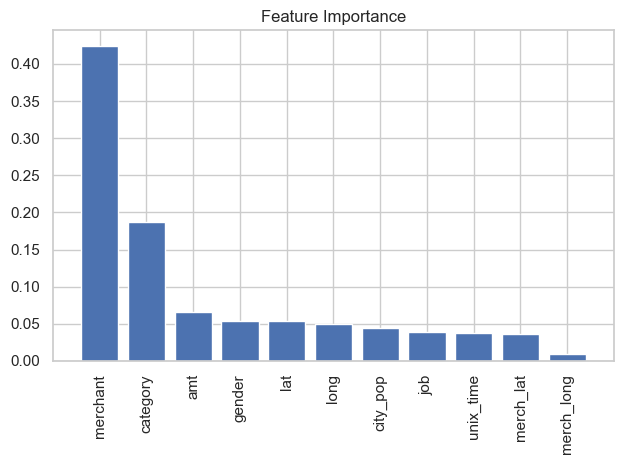

In [75]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[:11], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [78]:
accuracy

0.9942121194593865

# Machine Learning


## Applying Machine Learning Models to the Dataset

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
lr = LogisticRegression(C = 100.0, random_state = 1)
lr.fit(X_train_std, y_train)

In [ ]:
y_pred_lr = lr.predict(X_valid_std)
missclassifed_lr = (y_valid != y_pred_lr).sum()

print('Missclassified samples: %d' % missclassifed_lr)
print('Accuracy: %.2f' % accuracy_score(y_valid, y_pred_lr))

accuracy_lr = lr.score(X_valid_std, y_valid)
print('Accuracy: %.2f' % accuracy_lr)

In [ ]:
accuracy_lr